In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt       # Graphs and plots
import seaborn as sns
import folium                         # Maps
from folium.plugins import HeatMap    # I want to do a Heat Map
import plotly.express as px           # Interactive Plots and Maps

In [37]:
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [38]:
wego['DATE'] = pd.to_datetime(wego['DATE']) # Convert DATE to datetime

In [39]:
pd.set_option('display.max_columns', None)
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [40]:
# Convert DATE column to datetime (if needed)
wego['DATE'] = pd.to_datetime(wego['DATE'], errors='coerce').dt.floor('s')

# Convert key timestamp columns to datetime, rounded to nearest second
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], errors='coerce').dt.floor('s')
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], errors='coerce').dt.floor('s')
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'], errors='coerce').dt.floor('s')

# Extract hour (0–23) and day name (e.g. 'Tuesday')
wego['SCHED_HOUR'] = wego['SCHEDULED_TIME'].dt.hour
wego['ARRIVAL_HOUR'] = wego['ACTUAL_ARRIVAL_TIME'].dt.hour
wego['DEPARTURE_HOUR'] = wego['ACTUAL_DEPARTURE_TIME'].dt.hour

wego['SCHED_DAY'] = wego['SCHEDULED_TIME'].dt.day_name()
wego['ARRIVAL_DAY'] = wego['ACTUAL_ARRIVAL_TIME'].dt.day_name()
wego['DEPARTURE_DAY'] = wego['ACTUAL_DEPARTURE_TIME'].dt.day_name()

# Optional: Calculate delay in whole minutes
wego['ARRIVAL_DELAY_MIN'] = ((wego['ACTUAL_ARRIVAL_TIME'] - wego['SCHEDULED_TIME']).dt.total_seconds() / 60).round()
wego['DEPARTURE_DELAY_MIN'] = ((wego['ACTUAL_DEPARTURE_TIME'] - wego['SCHEDULED_TIME']).dt.total_seconds() / 60).round()

In [41]:
print(wego.columns.tolist())

['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'SCHED_HOUR', 'ARRIVAL_HOUR', 'DEPARTURE_HOUR', 'SCHED_DAY', 'ARRIVAL_DAY', 'DEPARTURE_DAY', 'ARRIVAL_DELAY_MIN', 'DEPARTURE_DELAY_MIN']


In [42]:
wego.dtypes

CALENDAR_ID                           int64
SERVICE_ABBR                          int64
ADHERENCE_ID                          int64
DATE                         datetime64[ns]
ROUTE_ABBR                            int64
BLOCK_ABBR                            int64
OPERATOR                              int64
TRIP_ID                               int64
OVERLOAD_ID                           int64
ROUTE_DIRECTION_NAME                 object
TIME_POINT_ABBR                      object
ROUTE_STOP_SEQUENCE                 float64
TRIP_EDGE                             int64
LATITUDE                            float64
LONGITUDE                           float64
SCHEDULED_TIME               datetime64[ns]
ACTUAL_ARRIVAL_TIME          datetime64[ns]
ACTUAL_DEPARTURE_TIME        datetime64[ns]
ADHERENCE                           float64
SCHEDULED_HDWY                      float64
ACTUAL_HDWY                         float64
HDWY_DEV                            float64
ADJUSTED_EARLY_COUNT            

#1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [43]:
on_time = wego['ADHERENCE'].between(-5, 5)
on_time_rate = on_time.mean() * 100
print(f"Overall on-time performance: {on_time_rate:.2f}%")

Overall on-time performance: 73.58%


In [44]:
early = wego['ADHERENCE'] < -5
on_time = wego['ADHERENCE'].between(-5, 5)
late = wego['ADHERENCE'] > 5

total = len(wego['ADHERENCE'].dropna())

early_pct = early.sum() / total * 100
on_time_pct = on_time.sum() / total * 100
late_pct = late.sum() / total * 100

print(f"Early: {early_pct:.2f}%")
print(f"On Time: {on_time_pct:.2f}%")
print(f"Late: {late_pct:.2f}%")

Early: 22.31%
On Time: 76.07%
Late: 1.61%


In [45]:
print(wego['ADH_CAT'].value_counts())


KeyError: 'ADH_CAT'

In [ ]:
print(wego[['ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_ONTIME_COUNT', 'TRIP_EDGE', 'ADH_CAT']].head(10))

In [ ]:
for index, row in wego.iterrows():
    if row['ADJUSTED_LATE_COUNT'] > 0:
        wego.loc[index, 'ADH_CAT'] = 'late'
        print(f"Index {index}: late")
    elif row['ADJUSTED_EARLY_COUNT'] > 0:
        if row['TRIP_EDGE'] == 2:
            wego.loc[index, 'ADH_CAT'] = "on time"
            print(f"Index {index}: on time (edge 2 early)")
        else:
            wego.loc[index, 'ADH_CAT'] = 'early'
            print(f"Index {index}: early")
    elif row['ADJUSTED_ONTIME_COUNT'] > 0:
        wego.loc[index, 'ADH_CAT'] = 'on time'
        print(f"Index {index}: on time")


In [ ]:
adh_counts = wego['ADH_CAT'].value_counts()
print(adh_counts)

In [ ]:
wego['ADH_CAT'] = pd.cut(
    wego['ADHERENCE'],
    bins=[-float('inf'), -6, 1, float('inf')],
    labels=['early', 'on time', 'late']
)

In [ ]:
wego['ADHERENCE'].dropna().hist(bins=50, figsize=(10, 6), color='skyblue')
plt.title('Distribution of Adherence (minutes)')
plt.xlabel('Minutes early (-) or late (+)')
plt.ylabel('Number of stop events')
plt.grid(True)
plt.show()


In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(wego['ADHERENCE'], bins=50, kde=True)

# Threshold lines
plt.axvline(-1, color='green', linestyle='--', label='Early Threshold')
plt.axvline(5, color='red', linestyle='--', label='Late Threshold')

# Labels and title
plt.title('Distribution of Adherence (in Minutes)')
plt.xlabel('Adherence (Actual - Scheduled Arrival)')
plt.ylabel('Stop Count')
plt.legend()

plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(wego['ADHERENCE'], bins=50, stat='count')  # no kde
plt.axvline(-1, color='green', linestyle='--', label='Early Threshold')
plt.axvline(5, color='red', linestyle='--', label='Late Threshold')
plt.title('Distribution of Adherence (in Minutes)')
plt.xlabel('Adherence (Actual - Scheduled Arrival)')
plt.ylabel('Stop Count')
plt.legend()
plt.show()


In [ ]:
wego['ON_TIME'] = wego['ADHERENCE'].between(-1, 5)


In [ ]:
wego.groupby('SCHED_HOUR')['ON_TIME'].mean().plot()

#2. How does direction of travel, route, or location affect the on-time performance?

In [46]:
wego.groupby('ROUTE_DIRECTION_NAME')['ON_TIME'].mean().plot.bar()

KeyError: 'Column not found: ON_TIME'

In [ ]:
wego.groupby('ROUTE_ABBR')['ON_TIME'].mean().sort_values().plot.bar()

In [ ]:
wego[['LATITUDE', 'LONGITUDE']].dropna().describe()

In [ ]:
valid_routes = (
    wego.groupby('ROUTE_ABBR')[['LATITUDE', 'LONGITUDE']]
    .apply(lambda g: g.dropna().shape[0])
    .sort_values(ascending=False)
)

print(valid_routes.head(10))

In [ ]:
print(wego['ROUTE_ABBR'].unique())


In [47]:
sample_route = wego[wego['ROUTE_ABBR'] == '52']
print(sample_route[['LATITUDE', 'LONGITUDE']].dropna().shape)


(0, 2)


In [48]:
route_id = '52'  # Replace with actual route
sample_route = wego[wego['ROUTE_ABBR'] == route_id]
coords = sample_route.sort_values('ROUTE_STOP_SEQUENCE')[['LATITUDE', 'LONGITUDE']].dropna().values.tolist()

if coords:
    m = folium.Map(location=[36.15, -86.75], zoom_start=13)
    folium.PolyLine(coords, tooltip=f'Route {52}', color='blue').add_to(m)
    folium.Marker(location=coords[0], tooltip='Start').add_to(m)
    folium.Marker(location=coords[-1], tooltip='End').add_to(m)
    m
else:
    print(f"No coordinates found for Route {52}")


No coordinates found for Route 52


In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(wego['LONGITUDE'], wego['LATITUDE'], c=wego['ON_TIME'], cmap='coolwarm', s=50)
plt.colorbar(label='On-Time Performance')
plt.title('Spatial Distribution of On-Time Performance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
#- Red zones → low adherence
#- Blue zones → high adherence


KeyError: 'ON_TIME'

<Figure size 1000x600 with 0 Axes>

In [ ]:
wego.groupby(['ROUTE_DIRECTION_NAME', 'ZONE'])['ON_TIME'].mean().unstack().plot()

In [50]:
wego['ON_TIME'] = wego['ADHERENCE'].between(-1, 5)

KeyError: 'ON_TIME'

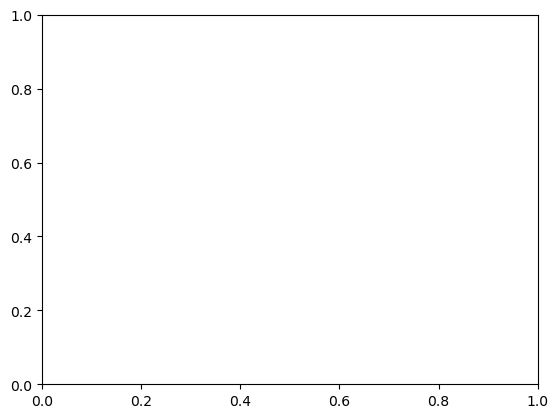

In [51]:
wego.sort_values('ROUTE_STOP_SEQUENCE').plot.scatter(
    x='LONGITUDE', y='ON_TIME', c='ROUTE_STOP_SEQUENCE', cmap='viridis', s=40
)

#3. How does time of day or day of week affect on-time performance?

In [ ]:
wego['DAY_OF_WEEK'] = pd.to_datetime(wego['ARRIVAL_TIME']).dt.day_name()

In [54]:
import pandas as pd
import plotly.express as px

# Load your dataset
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")  # Replace with your actual file path

# Group by hour of day
hourly = wego.groupby("DEPARTURE_HOUR")["ADHERENCE"].mean().reset_index()

# Group by day of week
weekly = wego.groupby("DEPARTURE_DAY")["ADHERENCE"].mean().reset_index()

# Optional: sort days if needed (0 = Monday, 6 = Sunday)
weekly = weekly.sort_values("DEPARTURE_DAY")

# Plot adherence by hour
fig_hour = px.bar(hourly, x="DEPARTURE_HOUR", y="ADHERENCE",
                  title="Average Adherence by Hour of Day",
                  labels={"ADHERENCE": "Avg Adherence", "DEPARTURE_HOUR": "Hour"},
                  text_auto=True)
fig_hour.show()

# Plot adherence by day
fig_day = px.bar(weekly, x="DEPARTURE_DAY", y="ADHERENCE",
                 title="Average Adherence by Day of Week",
                 labels={"ADHERENCE": "Avg Adherence", "DEPARTURE_DAY": "Day"},
                 text_auto=True)
fig_day.show()

# Print summary tables
print("Hourly Adherence Summary:")
print(hourly)

print("\nWeekly Adherence Summary:")
print(weekly)

KeyError: 'DEPARTURE_HOUR'

#4 How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

In [55]:
print(wego.columns.tolist())

['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']


#5 Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

#6 How much impact does being late or too spaced out at the first stop have downstream?

#7 What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?

#8 What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

In [ ]:
wego.groupby('ROUTE_STOP_SEQUENCE')['ADHERENCE'].mean().plot()

In [ ]:
wego['ELAPSED_MIN'] = (wego['ACTUAL_ARRIVAL_TIME'] - wego.groupby('TRIP_ID')['ACTUAL_ARRIVAL_TIME'].transform('min')).dt.total_seconds() / 60

In [ ]:
wego.groupby('ELAPSED_MIN')['ADHERENCE'].mean().plot()

In [ ]:
wego.groupby('ROUTE_STOP_SEQUENCE')['ADHERENCE'].std().plot()

In [ ]:
wego['DRIFT'] = (wego['ACTUAL_ARRIVAL_TIME'] - wego['SCHEDULED_TIME']).dt.total_seconds() / 60
wego.groupby('ROUTE_STOP_SEQUENCE')['DRIFT'].mean().plot()

In [ ]:
wego.groupby(['SCHED_DAY', 'TRIP_SEGMENT'])['ADHERENCE'].mean().unstack().plot()

#9 Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

In [ ]:

# Grab the first 10 valid coordinates
sample = wego[['LATITUDE', 'LONGITUDE']].dropna().head(10)

# Create a map centered on Nashville
m = folium.Map(location=[36.15, -86.75], zoom_start=13)

# Add markers for each stop
for _, row in sample.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']]).add_to(m)

m

In [ ]:

# Grab all valid coordinates
valid_coords = wego[['LATITUDE', 'LONGITUDE']].dropna()

# Create map
m = folium.Map(location=[36.15, -86.75], zoom_start=12)

# Add all stops as small blue dots
for _, row in valid_coords.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)
m.save('nashville_map.html')


In [11]:

# Create a map centered on Nashville
m = folium.Map(location=[36.15, -86.75], zoom_start=13)

# Add a single marker
folium.Marker(location=[36.15, -86.75], tooltip='Center of Nashville').add_to(m)

# Display the map
m

In [12]:
# Filter for low adherence (e.g., abs(adherence) > 5)
low_adherence = df[df['ADHERENCE'].abs() > 5]

# Create base map centered on your region
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Add heat map layer
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in low_adherence.iterrows()]
HeatMap(heat_data).add_to(m)

# Save or display
m.save("low_adherence_heatmap.html")


NameError: name 'df' is not defined

In [14]:
# Load the data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Filter for low adherence (e.g., abs(adherence) > 5)
low_adherence = wego[wego['ADHERENCE'].abs() > 5]

# Create base map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Prepare heat data: [lat, lon, weight]
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for index, row in low_adherence.iterrows()]

# Add heat map layer
HeatMap(heat_data, radius=8, blur=15, max_zoom=1).add_to(m)

# Save to HTML
m


In [17]:
# Load data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Convert time column
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Define time segments
segments = {
    "morning": (6, 9),
    "midday": (11, 14),
    "evening": (16, 19)
}

# Function to generate heat map for a time segment
def generate_segment_heatmap(df, label, start_hour, end_hour):
    segment_df = df[(df['DEPARTURE_HOUR'] >= start_hour) & (df['DEPARTURE_HOUR'] <= end_hour)]
    low_adherence = segment_df[segment_df['ADHERENCE'].abs() > 5]

    m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)
    heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
    HeatMap(heat_data, radius=8, blur=15).add_to(m)
    m.save(f"low_adherence_{label}.html")

# Generate maps
for label, (start, end) in segments.items():
    generate_segment_heatmap(wego, label, start, end)

    m

In [18]:
for _, row in low_adherence.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}
            """,
            max_width=300
        )
    ).add_to(m)


In [19]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Create map
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Add heat layer
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips
for _, row in low_adherence.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}
            """,
            max_width=300
        )
    ).add_to(m)

# Save map
m.save("low_adherence_morning_with_tooltips.html")

In [24]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Create map
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Add heat layer
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips
for _, row in low_adherence.iterrows():
    color = 'red' if row['ADHERENCE'] > 0 else 'purple'
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)


# Save map
m.save("low_adherence_morning_with_tooltips.html")

In [62]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_operator.html")

In [22]:
import os
print(os.getcwd())


C:\Users\user\workspace\c11\Python\projects\wego-wheely-wonka


In [63]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"<i style='background:{color};width:10px;height:10px;display:inline-block;margin-right:5px;'></i>{op}<br>"

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: auto;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_operator.html")

In [64]:


# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for evening and low adherence
evening = wego[(wego['DEPARTURE_HOUR'] >= 15) & (wego['DEPARTURE_HOUR'] <= 18)]
low_adherence_evening = evening[evening['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence_evening['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence_evening['LATITUDE'].mean(), low_adherence_evening['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence_evening.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence_evening.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_evening_by_operator.html")
# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_operator.html")

ZeroDivisionError: float division by zero

In [61]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for evening and low adherence
evening = wego[(wego['DEPARTURE_HOUR'] >= 15) & (wego['DEPARTURE_HOUR'] <= 18)]
low_adherence_evening = evening[evening['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence_evening['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence_evening['LATITUDE'].mean(), low_adherence_evening['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence_evening.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence_evening.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_evening_by_operator.html")

ZeroDivisionError: float division by zero

In [32]:
print(wego.columns.tolist())


['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES', 'DEPARTURE_HOUR']


In [33]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour and day of week
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour
wego['DAY_OF_WEEK'] = pd.to_datetime(wego['DATE']).dt.day_name()

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each day a unique color
days = low_adherence['DAY_OF_WEEK'].unique()
palette = sns.color_palette("Set2", len(days)).as_hex()
day_colors = dict(zip(days, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and day-colored markers
for _, row in low_adherence.iterrows():
    color = day_colors.get(row['DAY_OF_WEEK'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%<br>
            <b>Day:</b> {row['DAY_OF_WEEK']}
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend for days
legend_entries = ""
for day, color in day_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{day}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Day of Week Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/adherence_by_day_of_week.html")

In [69]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour and day of week
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour
wego['DAY_OF_WEEK'] = pd.to_datetime(wego['DATE']).dt.day_name()

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each day a unique color
days = low_adherence['DAY_OF_WEEK'].unique()
palette = sns.color_palette("Set2", len(days)).as_hex()
day_colors = dict(zip(days, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer
heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and day-colored markers
for _, row in low_adherence.iterrows():
    color = day_colors.get(row['DAY_OF_WEEK'], 'gray')
    radius = min(12, max(4, abs(row['ADHERENCE'])))

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1)}%<br>
            <b>Day:</b> {row['DAY_OF_WEEK']}
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend for days
legend_entries = ""
for day, color in day_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{day}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Day of Week Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/adherence_by_day_of_week.html")

In [76]:
import pandas as pd
import folium
##from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for evening and low adherence
evening = wego[(wego['DEPARTURE_HOUR'] >= 15) & (wego['DEPARTURE_HOUR'] <= 18)]
low_adherence_evening = evening[evening['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence_evening['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence_evening['LATITUDE'].mean(), low_adherence_evening['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
##heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence_evening.iterrows()]
##HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence_evening.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(14, max(6, abs(row['ADHERENCE'])))

    deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {deviation_pct}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_evening_by_operator.html")

In [77]:
import pandas as pd
import folium
##from folium.plugins import HeatMap
import seaborn as sns

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Assign each operator a unique color
operators = low_adherence['OPERATOR'].unique()
palette = sns.color_palette("husl", len(operators)).as_hex()
operator_colors = dict(zip(operators, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Optional: Add heat layer for density
##heat_data = [[row['LATITUDE'], row['LONGITUDE'], abs(row['ADHERENCE'])] for _, row in low_adherence.iterrows()]
##HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Add contextual tooltips and driver-colored markers
for _, row in low_adherence.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(14, max(6, abs(row['ADHERENCE'])))

    deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {deviation_pct}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build readable legend HTML
legend_entries = ""
for op, color in operator_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_operator.html")

In [86]:
import pandas as pd
import folium
import seaborn as sns
from collections import OrderedDict

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Build master operator list for consistent coloring
all_operators = sorted(wego['OPERATOR'].dropna().unique())
palette = sns.color_palette("husl", len(all_operators)).as_hex()
operator_colors = OrderedDict(zip(all_operators, palette))

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Add markers directly to map
for _, row in low_adherence.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(14, max(6, abs(row['ADHERENCE'])))
    deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {deviation_pct}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build legend only for operators used in this scroll
used_operators = sorted(low_adherence['OPERATOR'].dropna().unique())
legend_entries = ""
for op in used_operators:
    color = operator_colors.get(op, 'gray')
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_operator.html")

In [85]:
import pandas as pd
import folium
import seaborn as sns
from collections import OrderedDict

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Build master operator list for consistent coloring
all_operators = sorted(wego['OPERATOR'].dropna().unique())
palette = sns.color_palette("husl", len(all_operators)).as_hex()
operator_colors = OrderedDict(zip(all_operators, palette))

# Filter for evening and low adherence
evening = wego[(wego['DEPARTURE_HOUR'] >= 15) & (wego['DEPARTURE_HOUR'] <= 18)]
low_adherence_evening = evening[evening['ADHERENCE'].abs() > 5]

# Create map centered on average location
m = folium.Map(location=[low_adherence_evening['LATITUDE'].mean(), low_adherence_evening['LONGITUDE'].mean()], zoom_start=12)

# Add markers directly to map
for _, row in low_adherence_evening.iterrows():
    base_color = operator_colors.get(row['OPERATOR'], 'gray')
    radius = min(14, max(6, abs(row['ADHERENCE'])))
    deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=radius,
        color=base_color,
        fill=True,
        fill_color=base_color,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"""
            <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
            <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
            <b>Adherence:</b> {row['ADHERENCE']}<br>
            <b>Route:</b> {row['ROUTE_ABBR']}<br>
            <b>Trip:</b> {row['TRIP_ID']}<br>
            <b>Operator:</b> {row['OPERATOR']}<br>
            <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
            <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
            <b>Deviation %:</b> {deviation_pct}%
            """,
            max_width=300
        )
    ).add_to(m)

# Build legend only for operators used in this scroll
used_operators = sorted(low_adherence_evening['OPERATOR'].dropna().unique())
legend_entries = ""
for op in used_operators:
    color = operator_colors.get(op, 'gray')
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>{op}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Operator Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_evening_by_operator.html")

In [89]:
import pandas as pd
import folium
import seaborn as sns
from collections import OrderedDict

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for morning and low adherence
morning = wego[(wego['DEPARTURE_HOUR'] >= 6) & (wego['DEPARTURE_HOUR'] <= 9)]
low_adherence = morning[morning['ADHERENCE'].abs() > 5]

# Build route list and color palette
used_routes = sorted(low_adherence['ROUTE_ABBR'].dropna().unique())
palette = sns.color_palette("Set2", len(used_routes)).as_hex()
route_colors = OrderedDict(zip(used_routes, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence['LATITUDE'].mean(), low_adherence['LONGITUDE'].mean()], zoom_start=12)

# Add markers grouped by route
for route in used_routes:
    group = folium.FeatureGroup(name=f"Route {route}")
    subset = low_adherence[low_adherence['ROUTE_ABBR'] == route]
    base_color = route_colors.get(route, 'gray')

    for _, row in subset.iterrows():
        radius = min(14, max(6, abs(row['ADHERENCE'])))
        deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"
        hour = row['DEPARTURE_HOUR']

        marker = folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=radius,
            color=base_color,
            fill=True,
            fill_color=base_color,
            fill_opacity=0.7,
            popup=folium.Popup(
                f"""
                <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
                <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
                <b>Adherence:</b> {row['ADHERENCE']}<br>
                <b>Route:</b> {row['ROUTE_ABBR']}<br>
                <b>Trip:</b> {row['TRIP_ID']}<br>
                <b>Operator:</b> {row['OPERATOR']}<br>
                <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
                <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
                <b>Deviation %:</b> {deviation_pct}%
                """,
                max_width=300
            )
        )
        marker.add_child(folium.Tooltip(f"{hour}:00"))
        marker.add_to(group)

    group.add_to(m)

# Add layer control to toggle routes
folium.LayerControl(collapsed=False).add_to(m)

# Build legend for used routes
legend_entries = ""
for route, color in route_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>Route {route}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Route Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_morning_by_route.html")

In [90]:
import pandas as pd
import folium
import seaborn as sns
from collections import OrderedDict

# Load your data
wego = pd.read_csv("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/additional/Headway Data, 8-1-2023 to 9-30-2023.csv")

# Extract hour from departure time
wego['DEPARTURE_HOUR'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.hour

# Filter for evening and low adherence
evening = wego[(wego['DEPARTURE_HOUR'] >= 15) & (wego['DEPARTURE_HOUR'] <= 18)]
low_adherence_evening = evening[evening['ADHERENCE'].abs() > 5]

# Build route list and color palette
used_routes = sorted(low_adherence_evening['ROUTE_ABBR'].dropna().unique())
palette = sns.color_palette("Set2", len(used_routes)).as_hex()
route_colors = OrderedDict(zip(used_routes, palette))

# Create map centered on average location
m = folium.Map(location=[low_adherence_evening['LATITUDE'].mean(), low_adherence_evening['LONGITUDE'].mean()], zoom_start=12)

# Add markers grouped by route
for route in used_routes:
    group = folium.FeatureGroup(name=f"Route {route}")
    subset = low_adherence_evening[low_adherence_evening['ROUTE_ABBR'] == route]
    base_color = route_colors.get(route, 'gray')

    for _, row in subset.iterrows():
        radius = min(14, max(6, abs(row['ADHERENCE'])))
        deviation_pct = round(row['HDWY_DEV'] / row['SCHEDULED_HDWY'] * 100, 1) if row['SCHEDULED_HDWY'] != 0 else "N/A"
        hour = row['DEPARTURE_HOUR']

        marker = folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=radius,
            color=base_color,
            fill=True,
            fill_color=base_color,
            fill_opacity=0.7,
            popup=folium.Popup(
                f"""
                <b>Stop:</b> {row['TIME_POINT_ABBR']}<br>
                <b>Departure:</b> {row['ACTUAL_DEPARTURE_TIME']}<br>
                <b>Adherence:</b> {row['ADHERENCE']}<br>
                <b>Route:</b> {row['ROUTE_ABBR']}<br>
                <b>Trip:</b> {row['TRIP_ID']}<br>
                <b>Operator:</b> {row['OPERATOR']}<br>
                <b>Headway Dev:</b> {row['HDWY_DEV']}<br>
                <b>Scheduled Headway:</b> {row['SCHEDULED_HDWY']}<br>
                <b>Deviation %:</b> {deviation_pct}%
                """,
                max_width=300
            )
        )
        marker.add_child(folium.Tooltip(f"{hour}:00"))
        marker.add_to(group)

    group.add_to(m)

# Add layer control to toggle routes
folium.LayerControl(collapsed=False).add_to(m)

# Build legend for used routes
legend_entries = ""
for route, color in route_colors.items():
    legend_entries += f"""
    <div style="margin-bottom:6px;">
        <span style='display:inline-block;width:16px;height:16px;background:{color};margin-right:8px;border:1px solid #333;'></span>
        <span style='vertical-align:middle;'>Route {route}</span>
    </div>
    """

legend_html = f"""
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    max-height: 300px;
    overflow-y: auto;
    width: 220px;
    z-index:9999;
    font-size:14px;
    background-color: white;
    padding: 10px;
    border:2px solid grey;
    border-radius:6px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>Route Colors</b><br><br>
{legend_entries}
</div>
"""

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to your project folder
m.save("C:/Users/user/workspace/c11/Python/projects/wego-wheely-wonka/low_adherence_evening_by_route.html")